In [1]:
# tried methods:
# Down sampling:
# 1 vs 1 class
# 1 vs 3, 1 vs 5, 1 vs 7
# Over smapling:
# Smote, 1 vs 3, 1 vs 5, 1 vs 7
# Adasyn same
# adjust class weight:
# give smaller class more weight
# 

In [37]:
import pandas as pd
import numpy as np


In [3]:
df = pd.read_csv('XXXXXXXXXXXXXXXX')

In [47]:
X= df.drop('Convert', axis =1)

In [48]:
y = df['Convert']

In [49]:
from sklearn.model_selection import train_test_split

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 5, stratify = y, test_size = 0.2)

In [51]:
df_train = pd.concat([X_train,y_train], axis = 1)
class1 = df_train[df_train['Convert'] == 1]
class0 = df_train[df_train['Convert'] == 0]

class0_adj = class0.sample(frac = 0.00135, random_state = 5)

In [52]:
df_train_resampled = pd.concat([class1, class0_adj], axis = 0)

In [53]:
df_train_resampled.Targ_BillPay.value_counts()

0    654
1    653
Name: Targ_BillPay, dtype: int64

In [54]:
X_train = df_train_resampled.iloc[:,:-1]
y_train = df_train_resampled.iloc[:,-1]

In [55]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(random_state=5, criterion = 'entropy', n_jobs = -1)

In [56]:
model1 = forest.fit(X_train,y_train)

In [57]:
from sklearn.metrics import confusion_matrix
pred_y = model1.predict(X_test)
conf_mx = confusion_matrix(y_test, pred_y)
conf_mx

array([[77247, 43914],
       [   39,   124]], dtype=int64)

In [75]:
import joblib
import pandas
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from time import time
from time import time
def evaluate_model(name, model, features, labels):
    start = time()
    pred = model.predict(features)
    end = time()
    accuracy = round(accuracy_score(labels,pred),3)
    precision = round(precision_score(labels,pred),3)
    recall = round(recall_score(labels,pred),3)
    f1 = round(f1_score(labels,pred),3)
    roc = round(roc_auc_score(labels,pred),3)
    
    print('{} -- Accuracy:{} / Precision:{} / Recall:{} / F1:{} / ROC:{} / Latency:{}ms'.format(name, accuracy, precision, recall,f1,roc ,round(end-start)))

In [58]:
evaluate_model('Forest', model1, X_test, y_test)

Forest -- Accuracy:0.638 / Precision:0.003 / Recall:0.761 / F1:0.006 / ROC:0.699 / Latency:1ms


### above is single tree

In [ ]:
# Imbalanced Learn package provides Balanced Bagging Classifier for us:
from imblearn.ensemble import BalancedBaggingClassifier
# I used random forest as the base estimator, you can also use      
# decision tree, logistric regression, or any other classifiers. It 
# is very important to turn bootstrap to "False" to make sure       
# subsamples are drawn without any overlap

balbag = BalancedBaggingClassifier(base_estimator = forest, n_estimators = 500, bootstrap = False,  bootstrap_features= True,
                                  sampling_strategy = 'majority', replacement = False, n_jobs = -1, random_state = 5)
model_full_sample = balbag.fit(X_train, y_train)

In [34]:
model_full_sample = balbag.fit(X_train, y_train)

In [35]:
from sklearn.metrics import confusion_matrix
pred_y = model_full_sample.predict(X_test)
conf_mx2 = confusion_matrix(y_test, pred_y)
conf_mx2

array([[75300, 45861],
       [   25,   138]], dtype=int64)

In [36]:
evaluate_model('Forest', model_full_sample, X_test, y_test)

Forest -- Accuracy:0.622 / Precision:0.003 / Recall:0.847 / F1:0.006 / ROC:0.734 / Latency:122ms


In [62]:
import matplotlib.pyplot as plt

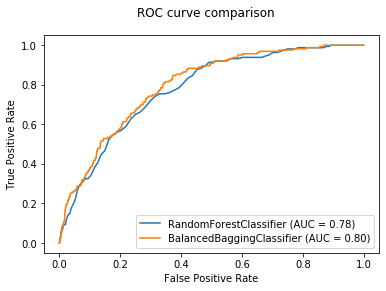

In [63]:
from sklearn.metrics import plot_roc_curve
import matplotlib.pyplot as plt

rfc_single_disp = plot_roc_curve(model1, X_test, y_test)
rfc_disp = plot_roc_curve(model_full_sample, X_test, y_test, ax=rfc_single_disp.ax_)
rfc_disp.figure_.suptitle("ROC curve comparison")

plt.show()

### Scuccess!